# Import the necessary libraries

In [1]:
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('Churn_Modelling.csv')

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set()

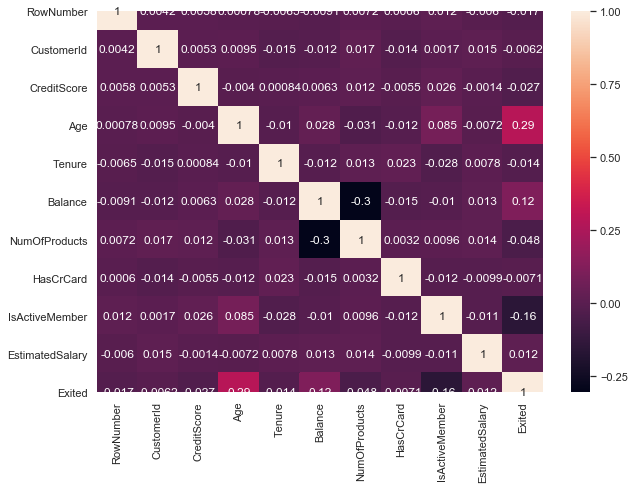

In [10]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
text_columns = data.select_dtypes('object').columns.tolist()

In [18]:
for column_name in text_columns:
    encoder = LabelEncoder()
    data[column_name] = encoder.fit_transform(data[column_name])

In [19]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [33]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
training_data = data.copy()

In [36]:
training_data.drop('Exited', axis=1, inplace=True)

In [37]:
training_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [38]:
output_data = data['Exited']

In [39]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size=0.3, random_state=42)

## Creating the neural network

In [50]:
classifier = Sequential()

In [51]:
training_data.shape

(10000, 10)

In [52]:
classifier.add(Dense(units=6, activation='relu', input_dim=10))

In [53]:
classifier.add(Dense(units=6, activation='relu'))

In [54]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [55]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
classifier.fit(X, Y, batch_size=10, epochs=50)

Epoch 1/50
7000/7000 [==============================] - 5s 717us/step - loss: 5.4916 - acc: 0.6569
Epoch 2/50
7000/7000 [==============================] - 4s 517us/step - loss: 5.3663 - acc: 0.6644
Epoch 3/50
7000/7000 [==============================] - 2s 345us/step - loss: 4.5806 - acc: 0.7143
Epoch 4/50
7000/7000 [==============================] - 2s 340us/step - loss: 3.7904 - acc: 0.7643
Epoch 5/50
7000/7000 [==============================] - 2s 293us/step - loss: 3.7865 - acc: 0.7646
Epoch 6/50
7000/7000 [==============================] - 1s 208us/step - loss: 3.8461 - acc: 0.7609
Epoch 7/50
7000/7000 [==============================] - 2s 255us/step - loss: 3.8642 - acc: 0.7597
Epoch 8/50
7000/7000 [==============================] - 1s 176us/step - loss: 3.8642 - acc: 0.7597
Epoch 9/50
7000/7000 [==============================] - 1s 167us/step - loss: 3.8642 - acc: 0.7597
Epoch 10/50
7000/7000 [==============================] - 1s 192us/step - loss: 3.8642 - acc: 0.7597
Epoch 11/

In [57]:
predictions = classifier.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [59]:
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [60]:
accuracy_score(predictions, y_test)

0.8053333333333333

## Improving the accuracy using Dropout Layer

In [78]:
classifier = Sequential()

In [79]:
classifier.add(Dense(units=6, activation='relu', input_dim=10))

In [65]:
from keras.layers import Dropout

In [80]:
classifier.add(Dropout(rate = 0.1))

In [81]:
classifier.add(Dense(units=6, activation='relu'))

In [82]:
classifier.add(Dropout(rate = 0.2))

In [83]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [84]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
classifier.fit(X, Y, batch_size=10, epochs=20)

Epoch 1/20
7000/7000 [==============================] - 5s 749us/step - loss: 3.2145 - acc: 0.7811
Epoch 2/20
7000/7000 [==============================] - 3s 444us/step - loss: 3.1381 - acc: 0.7826
Epoch 3/20
7000/7000 [==============================] - 2s 302us/step - loss: 3.1197 - acc: 0.7823
Epoch 4/20
7000/7000 [==============================] - 2s 267us/step - loss: 3.4181 - acc: 0.7613
Epoch 5/20
7000/7000 [==============================] - 2s 264us/step - loss: 3.1046 - acc: 0.7756
Epoch 6/20
7000/7000 [==============================] - 2s 276us/step - loss: 3.0782 - acc: 0.7847
Epoch 7/20
7000/7000 [==============================] - 2s 247us/step - loss: 3.0729 - acc: 0.7851
Epoch 8/20
7000/7000 [==============================] - 2s 261us/step - loss: 3.0698 - acc: 0.7846
Epoch 9/20
7000/7000 [==============================] - 2s 264us/step - loss: 3.0485 - acc: 0.7849
Epoch 10/20
7000/7000 [==============================] - 1s 193us/step - loss: 3.0656 - acc: 0.7834
Epoch 11/

In [86]:
predictions = classifier.predict(x_test)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [88]:
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [89]:
predictions = (predictions>0.5)

In [90]:
accuracy_score(predictions, y_test)

0.8053333333333333